In [209]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [210]:
df = pd.read_csv('ps4_clean.csv', header=0, sep=',') 
df.head()

,name,release,genres,metascore,users_score,publisher,rating,developer,is_Multiplayer,month,year,is_Exclusive,is_best
0,Red Dead Redemption 2,2018-10-26,"['Action Adventure', 'Open-World']",97,86.0,Rockstar Games,4,Rockstar Games,1,10,2018,0,1
1,Grand Theft Auto V,2014-11-18,"['Action Adventure', 'Modern', 'Open-World']",97,84.0,Rockstar Games,4,Rockstar Games,1,11,2014,0,1
2,Persona 5 Royal,2020-03-31,"['Role-Playing', 'Japanese-Style']",95,84.0,Atlus,4,Atlus,0,3,2020,1,1
3,The Last of Us Remastered,2014-07-29,"['Action Adventure', 'General', 'Modern']",95,92.0,SCEA,4,Naughty Dog,1,7,2014,1,1
4,God of War,2018-04-20,"['Action Adventure', 'Linear']",94,92.0,Sony Interactive Entertainment,4,SCE Santa Monica,0,4,2018,0,1


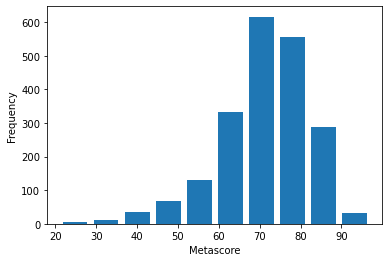

In [274]:
df.metascore.plot.hist(bins=10,rwidth=0.8)
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.show()

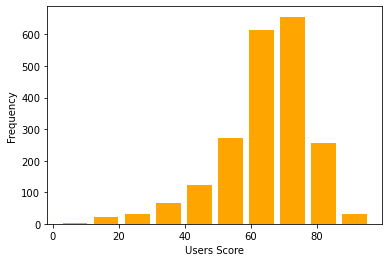

In [272]:
df.users_score.plot.hist(bins=10,rwidth=0.8,color='orange')
plt.xlabel('Users Score')
plt.ylabel('Frequency')
plt.show()

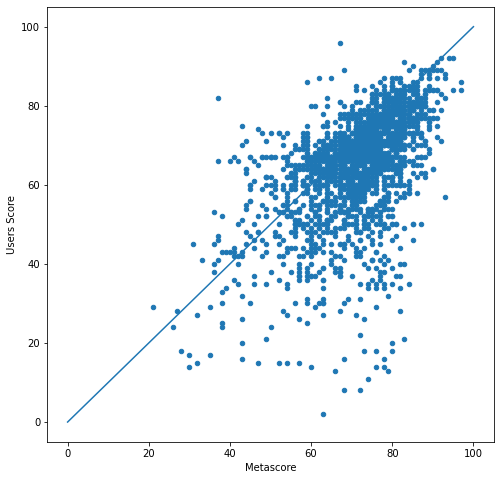

In [275]:
df2=df.copy()
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot([0, 100], [0, 100])
df2.plot.scatter(x='metascore', y='users_score', ax=ax)
plt.xlabel('Metascore')
plt.ylabel('Users Score')
plt.show()

464


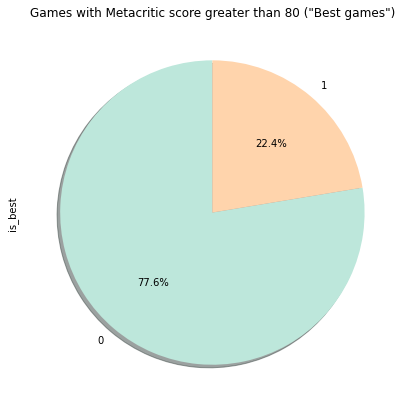

In [214]:
#How many games have metacritic score greater than 80?
best=df2.loc[df['is_best']==1]
print(len(best))
df2["is_best"].value_counts().plot(kind='pie',shadow = True,
figsize=(7,7), autopct='%1.1f%%',title='Games with Metacritic score greater than 80 ("Best games")',startangle=90,colormap='icefire')
plt.show()

58


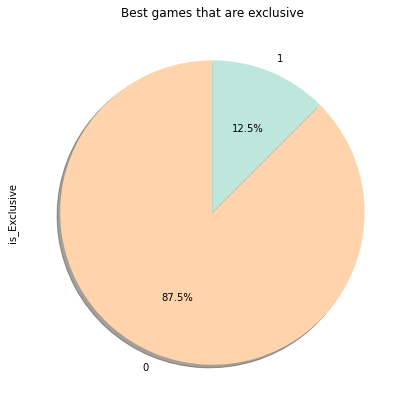

In [215]:
#How many of the best games are exclusive?
best_exc=best.loc[df['is_Exclusive']==1]
print(len(best_exc))
best['is_Exclusive'].value_counts().plot(kind='pie',shadow = True,
figsize=(7,7), autopct='%1.1f%%',title='Best games that are exclusive',startangle=90,colormap='icefire_r')
plt.show()

165


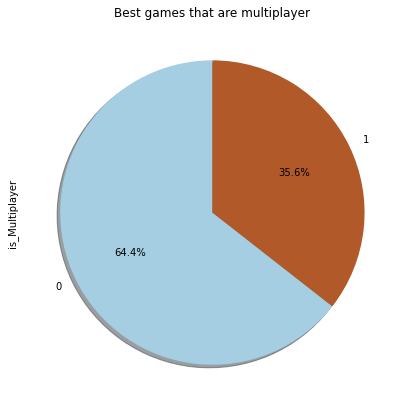

In [216]:
#How many of the best games are multiplayer?
best_exc=best.loc[df['is_Multiplayer']==1]
print(len(best_exc))
best['is_Multiplayer'].value_counts().plot(kind='pie',shadow = True,
figsize=(7,7), autopct='%1.1f%%',title='Best games that are multiplayer',startangle=90,colormap='Paired')
plt.show()

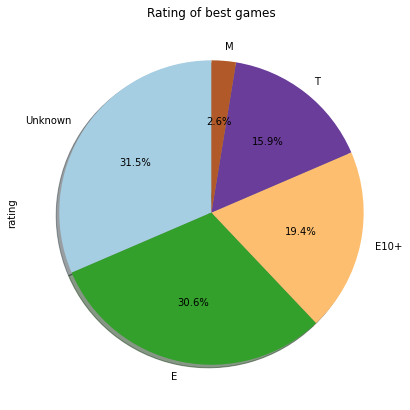

In [266]:
y = np.array([0, 1, 2, 3,4])
labels = ["Unknown", "E", "E10+", "T","M"]
best["rating"].value_counts().plot(kind='pie',shadow = True,
figsize=(7,7), autopct='%1.1f%%',title='Rating of best games',startangle=90,colormap='Paired',y=y,labels=labels)
plt.show()

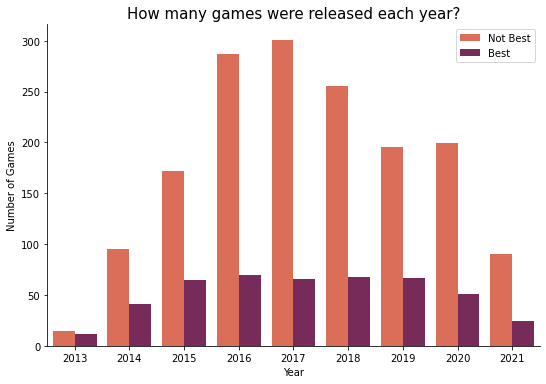

In [254]:
each_year = sns.catplot(
    x='year', 
    data=df2,
    kind='count', 
    hue='is_best', 
    height=5, 
    aspect=1.5,
    legend=False,
    palette='rocket_r'
    ).set_axis_labels('Year', 'Number of Games')
each_year.ax.legend(labels=['Not Best','Best'])
each_year.ax.set_title("How many games were released each year?",fontsize=15)
plt.show()

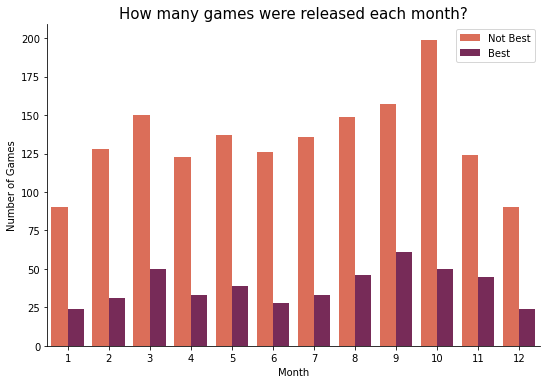

In [276]:
each_month = sns.catplot(
    x='month', 
    data=df2,
    kind='count', 
    hue='is_best', 
    height=5, 
    aspect=1.5,
    legend=False,
    palette='rocket_r'
    ).set_axis_labels('Month', 'Number of Games')
each_month.ax.legend(labels=['Not Best','Best'])
each_month.ax.set_title("How many games were released each month?",fontsize=15)
plt.show()

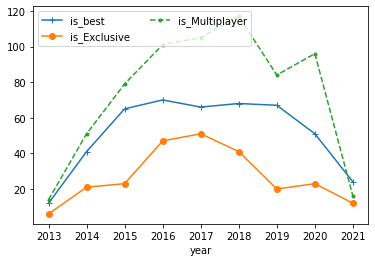

In [179]:
temp=df2.groupby(['year']).sum()[['is_best','is_Exclusive','is_Multiplayer']]
temp.plot(style=['+-','o-','.--']).legend(loc='upper left', ncol=2)
plt.show()

In [245]:
#Developers that have released most ps4 games.
df2.groupby('developer')['name'].count().sort_values(ascending=False)[:10]



developer
Telltale Games           42
Capcom                   37
EA                       29
Square Enix              28
Omega Force              23
Zen Studios              18
Ubisoft Montreal         17
Milestone S.r.l          17
DONTNOD Entertainment    15
Bandai Namco Games       15
Name: is_best, dtype: int64


In [193]:
#Developers that have released most ps4 best games.
df2=df2[df2.is_best==1]
df3=df2.groupby('developer')['metascore'].count().sort_values(ascending=False)[:10]
print(df3)

developer
Square Enix              14
Capcom                   14
EA                       12
Codemasters               8
Zen Studios               7
From Software             7
Ryu ga Gotoku Studios     7
Telltale Games            7
Arc System Works          7
Visual Concepts           6
Name: metascore, dtype: int64


In [268]:
#Publishers that have released most ps4 games.
df2.groupby('publisher')['name'].count().sort_values(ascending=False)[:10]



publisher
Square Enix                               104
Bandai Namco Games                         78
Ubisoft                                    66
Electronic Arts                            56
Capcom                                     50
Activision                                 48
Koei Tecmo Games                           46
Telltale Games                             46
Sony Interactive Entertainment             44
Warner Bros. Interactive Entertainment     39
Name: name, dtype: int64

In [269]:
#Publishers that have released most ps4 best games.
df2=df2[df2.is_best==1]
df3=df2.groupby('publisher')['metascore'].count().sort_values(ascending=False)[:10]
print(df3)

publisher
Square Enix                               37
Capcom                                    18
Electronic Arts                           17
SCEA                                      17
Activision                                16
Sega                                      16
Bandai Namco Games                        15
Ubisoft                                   14
Sony Interactive Entertainment            13
Warner Bros. Interactive Entertainment    13
Name: metascore, dtype: int64
